In [1]:
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = h5py.File('/Users/yuntse/data/slarchetto/larpix/pool/exttrig/2023-10-03/exttrig_2023_10_03_01_22_14_PDT.h5', 'r')

In [3]:
pkts = f['packets']

In [4]:
pkts.dtype

dtype([('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4')])

In [5]:
pkts[pkts['packet_type']==6]['timestamp']

array([503414, 503430, 503421, ..., 503415, 503420, 503414], dtype=uint64)

In [6]:
len(pkts[(pkts['packet_type']==6)]['timestamp'])

1116

In [7]:
np.set_printoptions(threshold=sys.maxsize)

In [8]:
pkts[(pkts['packet_type']==6)|(pkts['packet_type']==0)]['timestamp'][0:10000]

array([  3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
         3996,   3996,   3996,   3996,   3996,   3996,   3996,   3996,
      

In [9]:
len(pkts['timestamp'])

5679394

In [10]:
len(pkts[pkts['packet_type']==4]['timestamp'])

265719

In [11]:
mask = (pkts['packet_type'] == 0) & (pkts['valid_parity'] == 1)
ts = pkts[mask]['timestamp'].astype(np.float128)

Text(0, 0.5, 'timestamp')

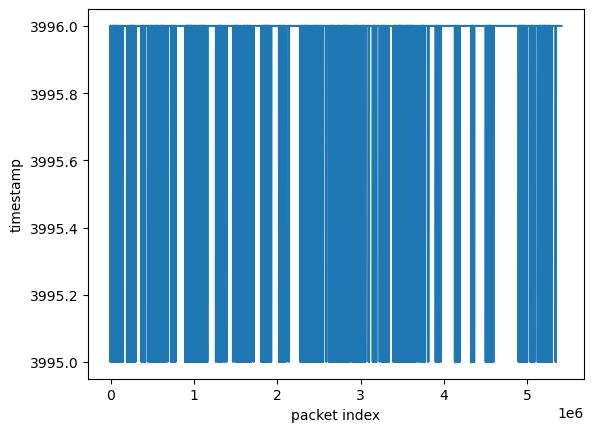

In [12]:
plt.plot(ts)
# plt.xlim(0, 10000)
plt.xlabel('packet index')
plt.ylabel('timestamp')

In [25]:
pkts[mask&(pkts['dataword']>110)&(pkts['chip_id']==76)]['dataword'][0:200]

array([120, 119, 113, 120, 118, 118, 127, 113, 119, 127, 125, 118, 116,
       127, 127, 127, 127, 113, 112, 116, 113, 113, 119, 119, 127, 117,
       113, 127, 159, 166, 152, 127, 111, 115, 151, 114, 120, 113, 113,
       135, 115, 127, 118, 116, 112, 119, 111, 119, 116, 121, 111, 120,
       114, 112, 112, 139, 125, 115, 111, 113, 114, 118, 122, 114, 114,
       121, 112, 111, 111, 145, 111, 117, 112, 124, 116, 111, 118, 120,
       115, 111, 112, 126, 127, 122, 149, 119, 113, 122, 118, 116, 123,
       120, 127, 127, 127, 136, 190, 111, 115, 112, 115, 117, 113, 119,
       116, 140, 111, 115, 119, 115, 127, 189, 127, 127, 127, 125, 126,
       113, 111, 127, 111, 113, 113, 115, 122, 111, 124, 117, 123, 111,
       144, 111, 112, 118, 111, 114, 117, 112, 117, 117, 121, 117, 111,
       121, 223, 134, 118, 191, 127, 119, 127, 120, 119, 116, 114, 114,
       112, 123, 141, 112, 121, 127, 114, 127, 146, 127, 135, 143, 143,
       153, 121, 125, 124, 139, 113, 117, 137, 116, 140, 113, 11

In [21]:
pkts[mask&(pkts['dataword']>110)]['chip_id'][0:200]

array([ 88,  39,  39,  39,  11,  11,  11,  11, 101, 101, 101, 101, 101,
       101, 101, 101,  12, 102, 102, 102, 102, 102, 102, 102, 103, 103,
       103, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105,
       105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,  76,  76,
        76,  76, 106,  76, 106, 106, 106, 106, 106, 106, 106,  46,  16,
        46,  16,  46,  16,  17, 107, 107, 107, 107, 107, 107, 107, 108,
       108, 108, 108, 108, 108,  19,  19,  19, 109, 109, 109, 109, 109,
       109, 109,  19,  19, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       110,  80, 110, 110, 110, 100,  90, 100, 100, 100, 100, 100,  29,
        56,  86,  96,  86,  56,  86,  86,  86,  86,  26,  26,  56,  95,
        95,  95,  95,  95, 104,  82,  34,  66,  66,  66,  66,  66,  36,
        36,  11,  11,  11, 101, 101, 101, 101, 101, 101, 101, 101,  42,
       102, 102, 102, 102, 102, 102, 102, 103, 103, 103,  13, 103, 104,
       104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 10

In [6]:
ch = pkts[pkts['packet_type']==0]['channel_id']

(array([ 84195., 110984., 110981., 110972., 110980., 110981.,      0.,
             0.,      0.,      0., 110975., 110982., 110977., 110984.,
        110988., 110983., 110988., 110988., 110980., 110985., 110985.,
        110976.,      0.,      0.,      0.,      0., 110970., 110977.,
        110973., 110975., 110980., 110977., 110981., 110976., 110978.,
        110977., 110977., 110977.,      0.,      0.,      0., 110979.,
        110969., 110946., 110976., 110983., 110980., 110973., 110979.,
        110974., 110977., 110978., 110977., 110975.,      0.,      0.,
             0.,      0., 110970., 110977., 110977., 110975., 110981.,
        110984.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60

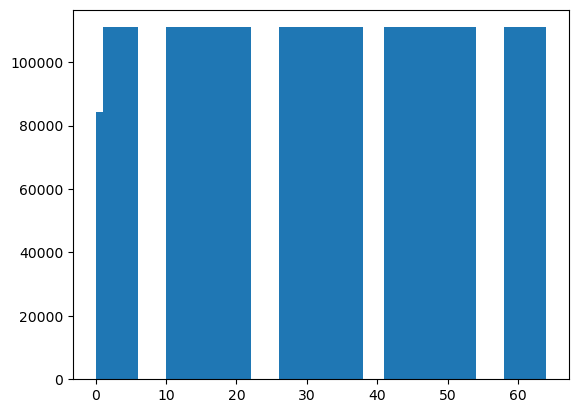

In [9]:
plt.hist(ch, bins = range(0, 65, 1))

In [10]:
chip = pkts[pkts['packet_type']==0]['chip_id']

(array([54123., 54123., 54121., 54123., 54123., 54122., 54121., 54118.,
        54124., 54099., 54126., 54120., 54123., 54121., 54121., 54123.,
        54123., 54101., 54065., 54051., 54114., 54119., 54124., 54126.,
        54114., 54129., 54121., 54119., 54119., 54125., 54123., 54124.,
        54123., 54123., 54124., 54121., 54123., 54124., 54123., 54101.,
        54121., 54127., 54121., 54123., 54119., 54122., 54122., 54098.,
        54064., 54052., 54120., 54123., 54116., 54120., 54122., 54119.,
        54119., 54119., 54118., 54128., 54122., 54122., 54122., 54123.,
        54122., 54124., 54122., 54122., 54104., 53998., 54105., 54112.,
        54105., 54103., 54019., 54106., 54118., 54094., 54050., 54041.,
        54123., 54113., 54125., 54125., 54112., 54119., 54123., 54104.,
        54070., 54054., 54122., 54123., 54112., 54107., 54121., 54121.,
        54119., 54123., 54121., 54098.]),
 array([ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23., 

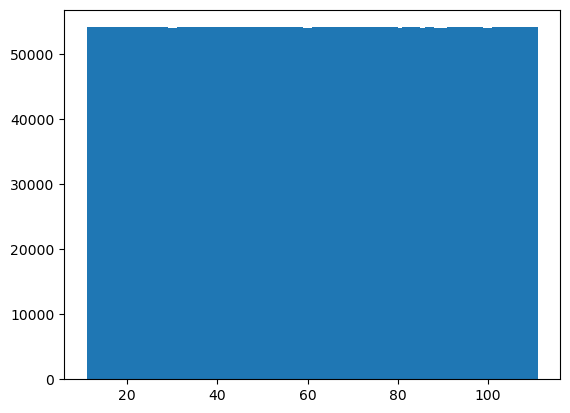

In [13]:
plt.hist(chip, bins = range(11, 112, 1))

In [2]:
pix_loc = np.load('/Users/yuntse/data/slarchetto/larpix/etc/layouts/layout-2.4.0.npy')

In [17]:
pix_loc

array([[-139.671,  148.539],
       [-144.105,  152.973],
       [-148.539,  152.973],
       ...,
       [ 148.539, -126.369],
       [ 144.105, -126.369],
       [ 139.671, -126.369]])

In [3]:
np.argwhere(np.isnan(pix_loc))

array([[   6,    0],
       [   6,    1],
       [   7,    0],
       ...,
       [6392,    1],
       [6393,    0],
       [6393,    1]])